In [2]:
# phase_kickback.ipynb

import matplotlib.pyplot as plt
import numpy as np
import qiskit
from IPython.display import Math
from qiskit import (
    Aer,
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    assemble,
    execute,
)
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
)

# Cell 1

# Calculate tensor product using a "row vector" which
# is a 1-dimensional structure having 2 elements

t = np.array([0, 1]) #declare true bit
display(t.shape) #one dimensional array

t3 = np.kron(t, np.kron(t, t)) #t tensored to itself three times, row vector
display(array_to_latex(t3, prefix=r"\mathbf{T^{\otimes 3}}="))

(2,)

<IPython.core.display.Latex object>

In [3]:
# Cell 2 - Tensor product using a "column vector"
# which now is a 2-dimensional matrix (2x1)
t = np.array([[0], [1]])
display(t.shape)
t3 = np.kron(t, np.kron(t, t)) #column vector, t tensored to itself three times
display(array_to_latex(t3, prefix=r"\mathbf{T^{\otimes 3}}="))

(2, 1)

<IPython.core.display.Latex object>

In [4]:
# Cell 3 - Tensor product using a "column vector"
# but transforming the vector to a 2D matrix
# by adding a new axis right before it is displayed

t = np.array([0, 1])
t3 = np.kron(t, np.kron(t, t))
display(array_to_latex(t3[:, np.newaxis], prefix=r"\mathbf{T^{\otimes 3}}="))

<IPython.core.display.Latex object>

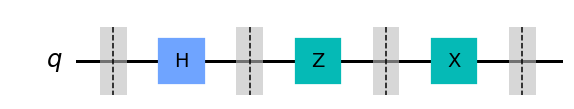

<IPython.core.display.Latex object>

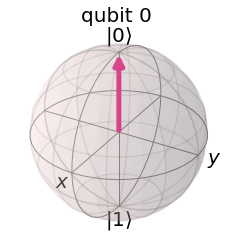

<IPython.core.display.Latex object>

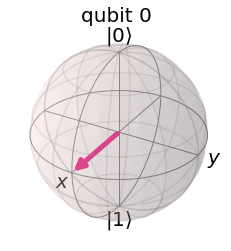

<IPython.core.display.Latex object>

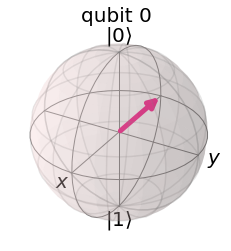

<IPython.core.display.Latex object>

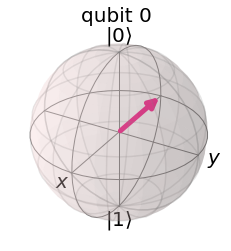

In [5]:
# Cell 4 - Phase Swap (Real Amplitude)

backend = Aer.get_backend("aer_simulator")
qc = QuantumCircuit(1)

qc.save_statevector("sv1") #state vector before any gate op
qc.h(0)
qc.save_statevector("sv2") #state vector after hadamard
qc.z(0)
qc.save_statevector("sv3") #state vector after z rotation
qc.x(0)
qc.save_statevector() #state vector after x rotation
result = execute(qc, backend, shots=1).result()
display(qc.draw(output="mpl", scale=1.5))

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.get_statevector()

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(plot_bloch_multivector(sv1))

display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(plot_bloch_multivector(sv2))

display(array_to_latex(sv3, prefix="\\text{Statevector 3} = "))
display(plot_bloch_multivector(sv3))

display(array_to_latex(sv4, prefix="\\text{Statevector 4} = "))
display(plot_bloch_multivector(sv4))

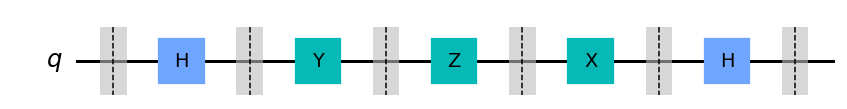

<IPython.core.display.Latex object>

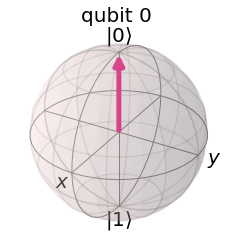

<IPython.core.display.Latex object>

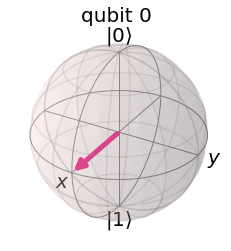

<IPython.core.display.Latex object>

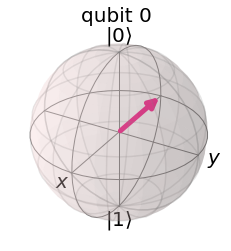

<IPython.core.display.Latex object>

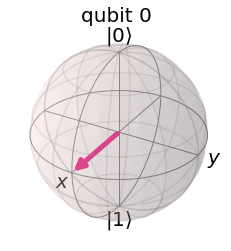

<IPython.core.display.Latex object>

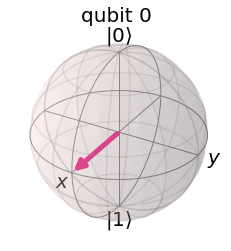

<IPython.core.display.Latex object>

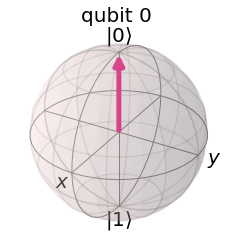

In [6]:
# Cell 5 - Complex Amplitude

qc = QuantumCircuit(1)
qc.save_statevector("sv1") #start at 0
qc.h(0) #equal amplitude superposition
qc.save_statevector("sv2") 
qc.y(0) #rotation around y, amplitude becomes imaginary
qc.save_statevector("sv3") 
qc.z(0) #rotation around z
qc.save_statevector("sv4")
qc.x(0) #rotation around x
qc.save_statevector("sv5")
qc.h(0) #rotate back up to 0
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
display(qc.draw(output="mpl", scale=1.5))

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]
sv5 = result.data(0)["sv5"]
sv6 = result.get_statevector()

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(plot_bloch_multivector(sv1))

display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(plot_bloch_multivector(sv2))

display(array_to_latex(sv3, prefix="\\text{Statevector 3} = "))
display(plot_bloch_multivector(sv3))

display(array_to_latex(sv4, prefix="\\text{Statevector 4} = "))
display(plot_bloch_multivector(sv4))

display(array_to_latex(sv5, prefix="\\text{Statevector 5} = "))
display(plot_bloch_multivector(sv5))

display(array_to_latex(sv6, prefix="\\text{Statevector 6} = "))
display(plot_bloch_multivector(sv6))

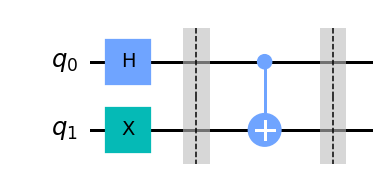

<IPython.core.display.Latex object>

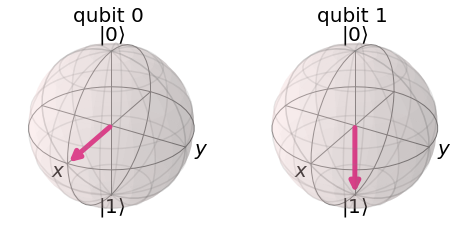

<IPython.core.display.Latex object>

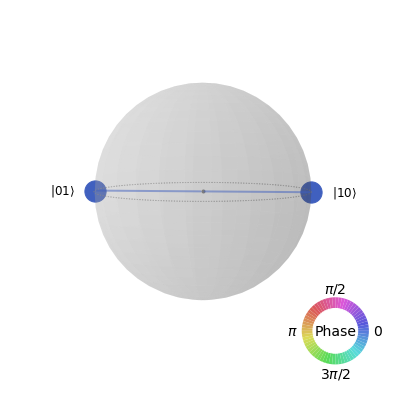

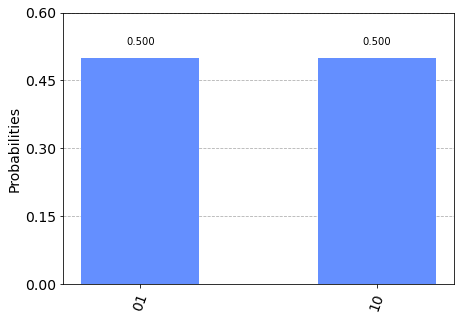

In [7]:
# Cell 6 - Entanglement WITHOUT phase kickback

backend = Aer.get_backend("aer_simulator")
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.save_statevector("sv1") #q1 points at south pole
qc.cx(0, 1)
qc.save_statevector() #phi is 0 degrees, positive x

display(qc.draw(output="mpl", scale=1.5))

result = execute(qc, backend, shots=10_000).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.get_statevector()

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(plot_bloch_multivector(sv1))

display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(plot_state_qsphere(sv2))

display(plot_histogram(counts))

In [ ]:
# Cell 7 - Entanglement WITH phase kickback 
#phase information from target affectst the control line

qc = QuantumCircuit(2)
qc.h(0) #hadamard on q0, pass into cx which entangles it with q1
qc.x(1)
qc.h(1) #hadamard on qubit one, leads to phase kickback
qc.save_statevector("sv1")
qc.cx(0, 1)
qc.save_statevector()

display(qc.draw(output="mpl", scale=1.5))

result = execute(qc, backend, shots=10_000).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.get_statevector()

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(plot_bloch_multivector(sv1))

display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(plot_state_qsphere(sv2))

display(plot_histogram(counts))